# Data Visualization with Pandas and Matplotlib on drinks dataset

In [1]:
# import library 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# set figuresize and fontsize 
plt.rcParams['figure.figsize'] = (6,4) 
plt.rcParams['font.size'] = 12

In [2]:
# load data 
drink_cols = ["country", 'beer', 'spirit', 'wine', 'liters', 'continent']
drinks = pd.read_csv("../datasets/drinks.csv",header=0, names=drink_cols)
drinks

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


##  Histogram: show the distribution of a numerical variable

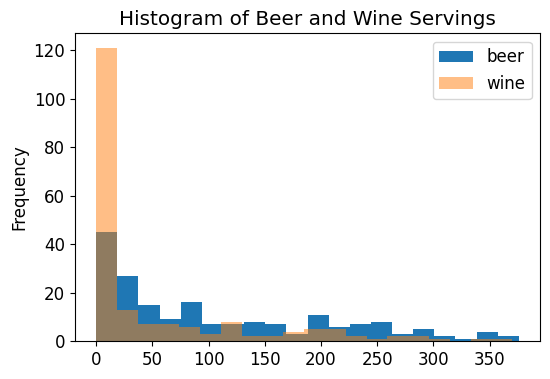

In [3]:
### plot Beer and Wine Servings histogram 
drinks.beer.plot(kind="hist", bins=20, title="Histogram of Beer and Wine Servings")
drinks.wine.plot(kind="hist", bins=20, title="Histogram of Beer and Wine Servings", alpha=0.5)
plt.ylabel("Frequency")
plt.legend()


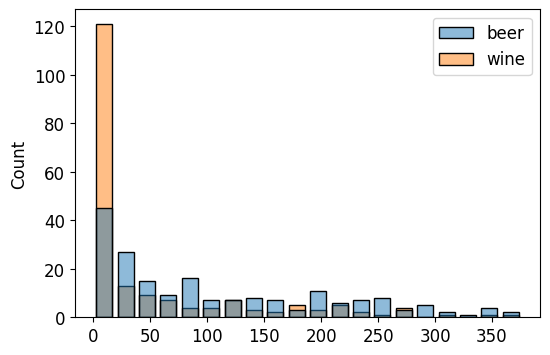

In [4]:
sns.histplot(drinks[['beer','wine']], shrink=.75, bins=20);

### Grouped Histograms

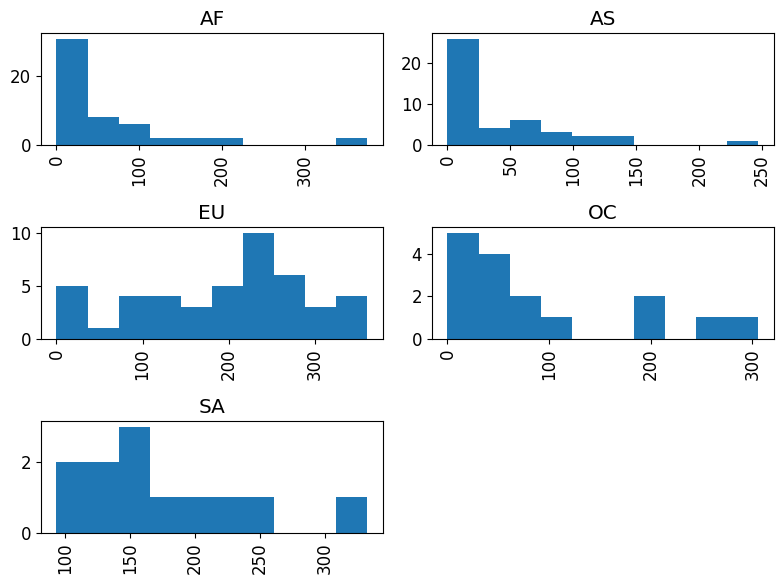

In [5]:
# histogram of beer survings group by continent 
drinks.hist(column='beer', by='continent',figsize=(8,6))
plt.tight_layout()

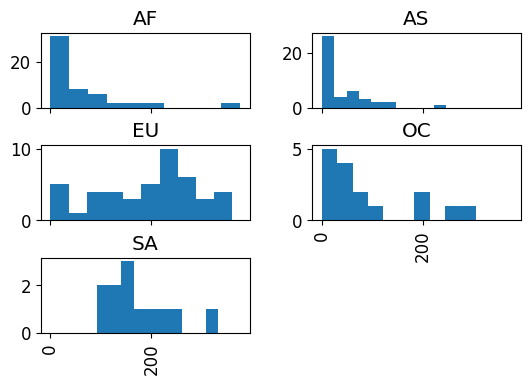

In [6]:
# share the x-axis 
drinks.hist(column='beer', by='continent', sharex=True); 

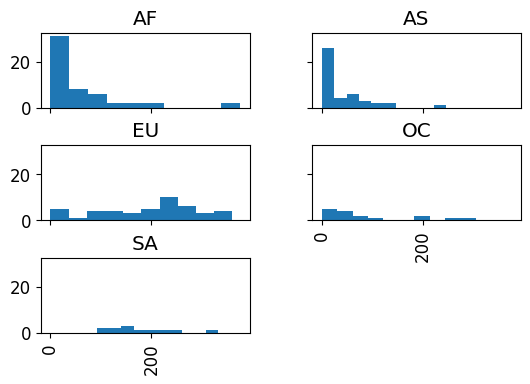

In [7]:
# share the x and y axis 
drinks.hist(column='beer', by='continent', sharex=True, sharey=True); 

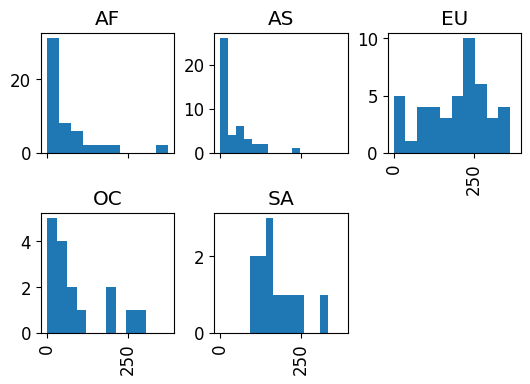

In [8]:
# change the layout 
drinks.hist(column='beer', by='continent', sharex=True, layout=(2, 3));

##  Density plot 

Represents a smooth version of a histogram

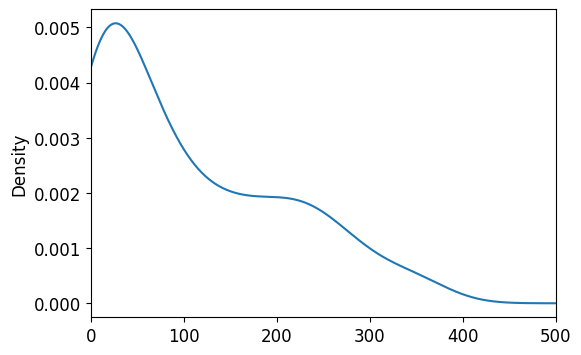

In [9]:
drinks.beer.plot(kind="density", xlim=(0, 500));

## Scatter Plot

Show the relationship between two numerical variables

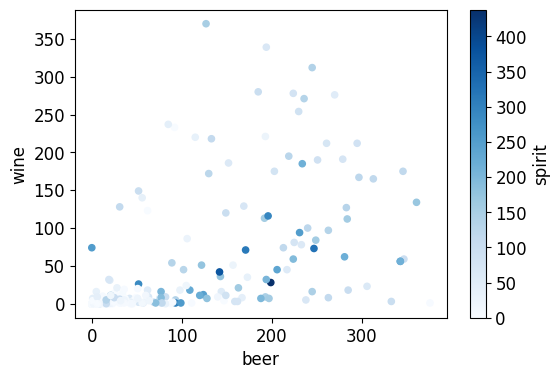

In [10]:
# vary point color by spirit servings 
drinks.plot(kind="scatter", x="beer", y="wine", c="spirit", colormap="Blues"); 

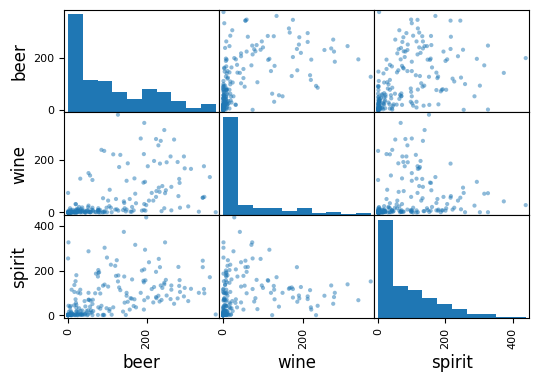

In [11]:
# scatter matrix of 3 numerical columns 
pd.plotting.scatter_matrix(drinks[['beer', 'wine', 'spirit']]); 

##  Bar Plot

show a numerical comparison across different categories

In [12]:
# count the number of countries in each continent 
drinks.continent.value_counts()

AF    53
EU    45
AS    44
OC    16
SA    12
Name: continent, dtype: int64

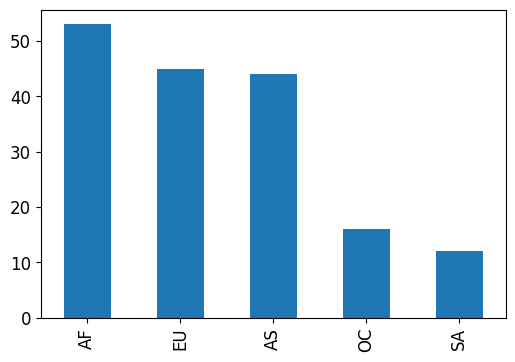

In [13]:
# compare with bar plot 
drinks.continent.value_counts().plot(kind="bar"); 

In [14]:
# calculate the mean alcohol amounts for each continent 
drinks.groupby('continent').mean() 

/tmp/ipykernel_54299/3066141365.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  drinks.groupby('continent').mean()


,beer,spirit,wine,liters
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


/tmp/ipykernel_54299/3125997527.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  drinks.groupby('continent').mean().plot(kind='bar');


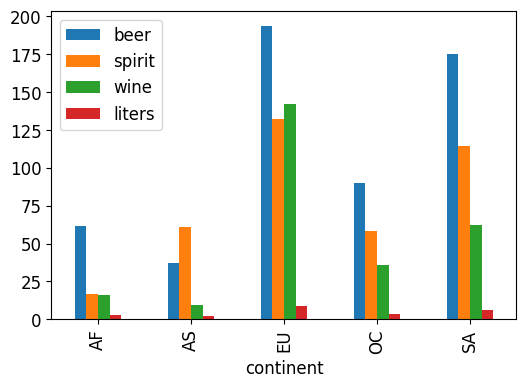

In [15]:
# side-by-side bar plots 
drinks.groupby('continent').mean().plot(kind='bar'); 

/tmp/ipykernel_54299/2679200680.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  drinks.groupby('continent').mean().drop('liters', axis=1).plot(kind='bar');


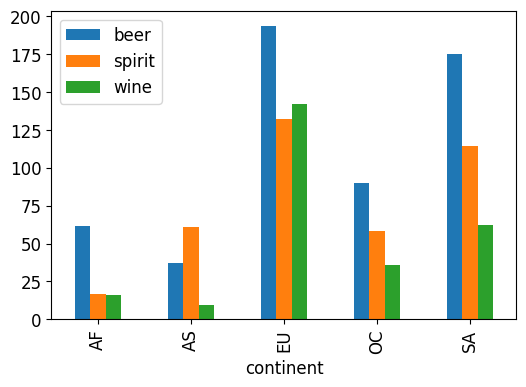

In [16]:
# drop the liters column
drinks.groupby('continent').mean().drop('liters', axis=1).plot(kind='bar'); 

/tmp/ipykernel_54299/112084965.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  drinks.groupby('continent').mean().drop('liters', axis=1).plot(kind='bar', stacked=True);


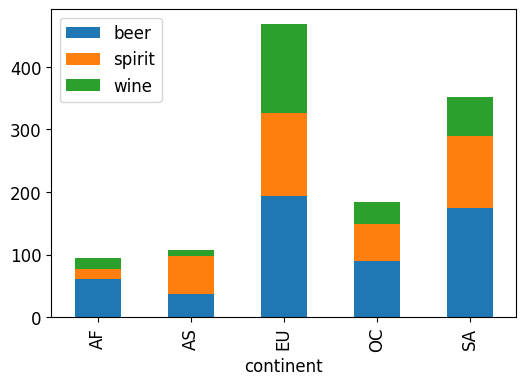

In [17]:
# stacked bar plots 
drinks.groupby('continent').mean().drop('liters', axis=1).plot(kind='bar', stacked=True); 

## Box Plot

Boxplots  are used to show the distribution of categorical data. A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. 
The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

__Five-Number Summary__
* min = minimum value
* 25% = first quartile (Q1) = median of the lower half of the data
* 50% = second quartile (Q2) = median of the data
* 75% = third quartile (Q3) = median of the upper half of the data
* max = maximum value
  
(More useful than mean and standard deviation for describing skewed distributions)
* Interquartile Range (IQR) = Q3 - Q1

__Outliers__ 
* below Q1 - 1.5 * IQR
* above Q3 + 1.5 * IQR

In [18]:
# show five-number summary of spirit 
drinks.spirit.describe() 

count    193.000000
mean      80.994819
std       88.284312
min        0.000000
25%        4.000000
50%       56.000000
75%      128.000000
max      438.000000
Name: spirit, dtype: float64

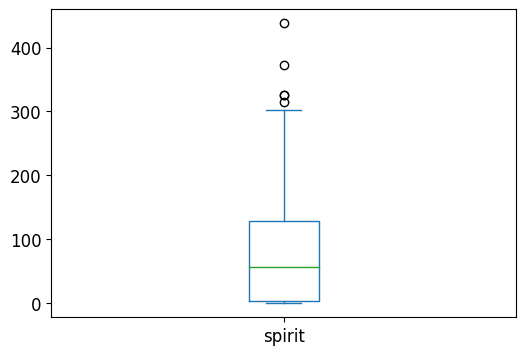

In [19]:
# compare with boxplot 
drinks.spirit.plot(kind='box');  

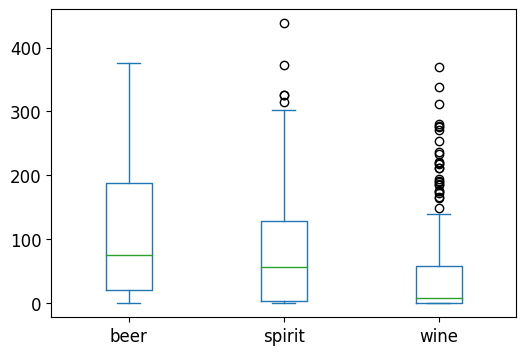

In [20]:
# include multiple variables 
drinks.drop('liters', axis=1).plot(kind='box'); 

## Grouped Box Plots

show one box plot for each group

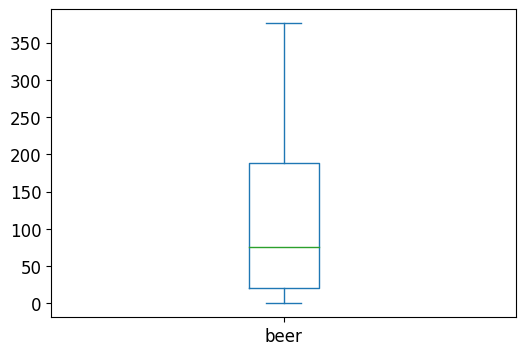

In [21]:
# remainder: boxplot of beer survings 
drinks.beer.plot(kind='box'); 

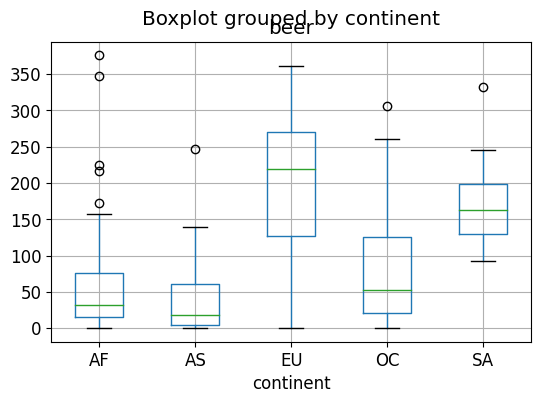

In [22]:
# boxplot of beer survings group by continent 
drinks.boxplot(column='beer', by='continent'); 

 ## Useful Functionality

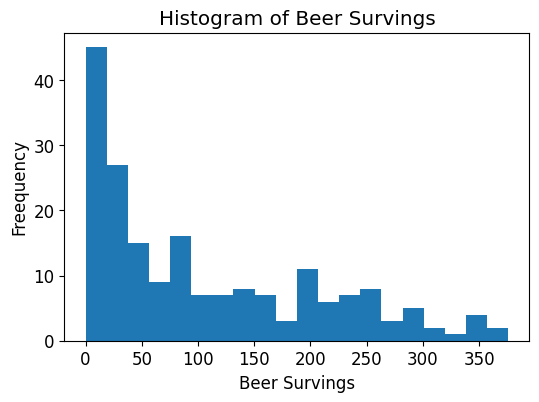

In [23]:
# saving a plot to a file 
drinks.beer.plot(kind='hist', bins=20, title="Histogram of Beer Survings")
plt.xlabel("Beer Survings")
plt.ylabel("Freequency")
plt.savefig("beer_survings.png") # .png, .tiff, .pdf, .jpeg 

In [24]:
# list available plot style 
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


Text(0, 0.5, 'Frequnecy')

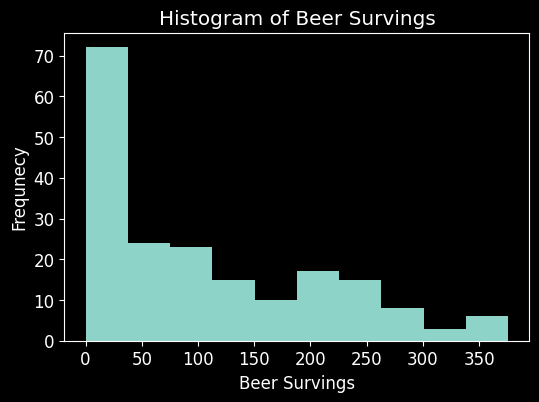

In [25]:
# use plot style: dark_background 
plt.style.use('dark_background')

drinks.beer.plot(kind="hist", title="Histogram of Beer Survings")
plt.xlabel("Beer Survings")
plt.ylabel("Frequnecy")

In [26]:
# revert to default
plt.style.use('default')

# Data Visualization with Seaborn on tips dataset

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

As Seaborn compliments and enhances Matplotlib, the learning curve is quite gradual. If you are familiar with Matplotlib, you are already halfway done with Seaborn.

## Load data

We will use the tips dataset -  with 244 rows and 7 variables

	total_bill : bill in dollars,
	tip 	   : tip in dollars,
	sex        : sex of the bill payer,
	smoker     : whether there were smokers in the party,
	day        : day of the week,
	time       : time of day,
	size 	   : size of the party.

The data was reported in a collection of case studies for business statistics (Bryant & Smith 1995).



In [27]:
# Seaborn comes with built-in data sets!
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Barplot and countplot

With these plots you can aggregate data off a categorical feature in your data. 

Barplot is a general plot that allows you to aggregate the categorical data based off some function, by default the mean.

Countplot is essentially the same as barplot except the estimator is explicitly counting the number of occurrences.

<AxesSubplot: xlabel='sex', ylabel='total_bill'>

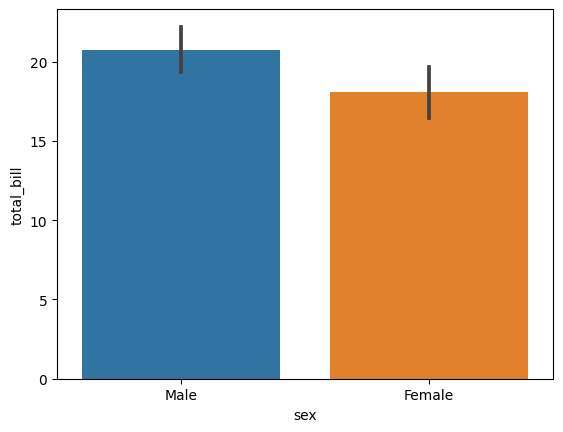

In [28]:
sns.barplot(x='sex',y='total_bill',data=tips)

<AxesSubplot: xlabel='sex', ylabel='total_bill'>

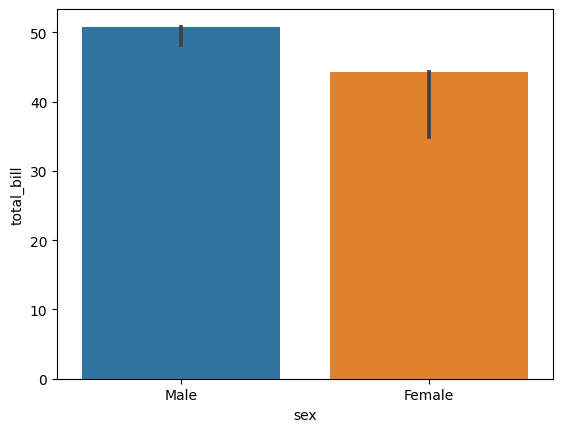

In [29]:
# You can set the estimator object function, or give your own, that converts a vector to a scalar:
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.max)

<AxesSubplot: xlabel='sex', ylabel='count'>

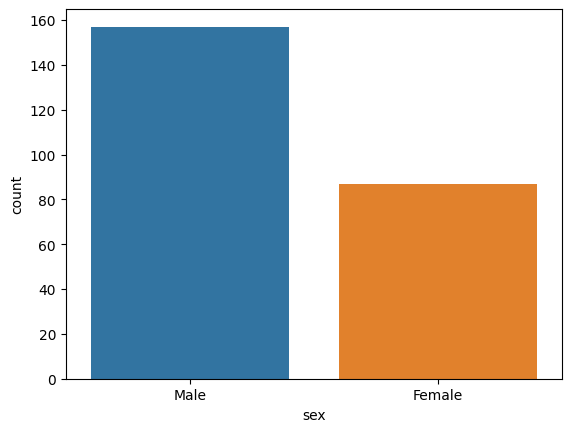

In [30]:
# countplot is essentially the same as barplot except the estimator is explicitly counting the number of occurrences. Which is why we only pass the x value

sns.countplot(x='sex',data=tips)

## Boxplot

Boxplots (and violinplots, which are not discussed here) are used to show the distribution of categorical data. A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.


__Five-Number Summary__
* min = minimum value
* 25% = first quartile (Q1) = median of the lower half of the data
* 50% = second quartile (Q2) = median of the data
* 75% = third quartile (Q3) = median of the upper half of the data
* max = maximum value
  
(More useful than mean and standard deviation for describing skewed distributions)
* Interquartile Range (IQR) = Q3 - Q1

__Outliers__ 
* below Q1 - 1.5 * IQR
* above Q3 + 1.5 * IQR

<AxesSubplot: xlabel='sex', ylabel='total_bill'>

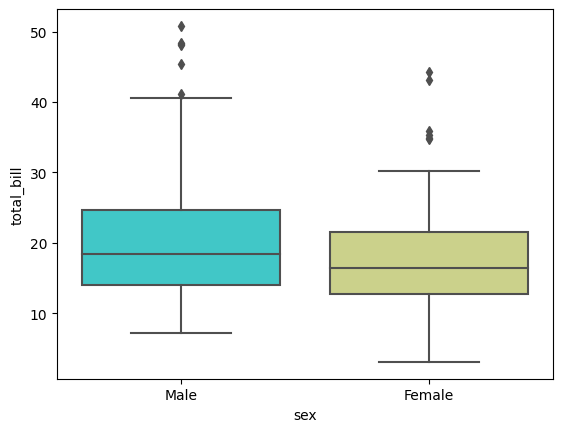

In [31]:
sns.boxplot(x="sex", y="total_bill", data=tips,palette='rainbow')

## Pairplot 

Plots pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns).

The diagonal plots are the univariate distribution plot, used to show the marginal distribution of the data in each column.

Assigning a hue variable adds a semantic mapping and changes the default marginal plot to a layered kernel density estimate (KDE):

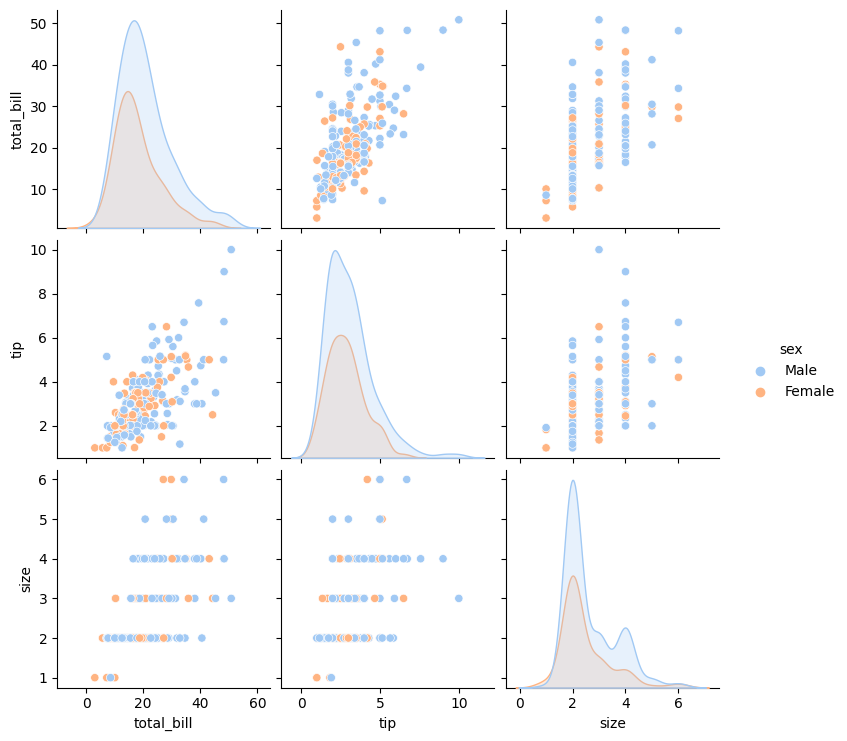

In [32]:
# separate by sex and color 
sns.pairplot(tips, hue='sex', palette='pastel')

In [33]:
# It’s possible to force marginal histograms:
sns.pairplot(tips, hue='sex', palette='pastel', diag_kind='hist')

## Heatmap

A heatmap is a two-dimensional graphical representation of data where the individual values that are contained in a matrix are represented as colours.

In order for a heatmap to work properly, your data should already be in a matrix form, the sns.heatmap function basically just colors it in for you. 

For example, you can use DataFrame.corr() method to get the pairwise correlation of columns. Thus you can visualize the strength of relationships between numerical variables. Correlation plots are used to understand which variables are related to each other and the strength of this relationship

/tmp/ipykernel_46887/1579789445.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(tips.corr())


<AxesSubplot: >

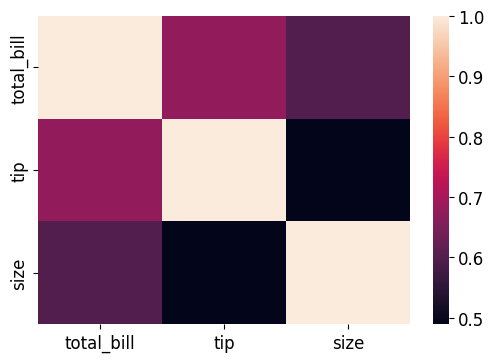

In [ ]:
sns.heatmap(tips.corr())

/tmp/ipykernel_46887/3857326825.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(tips.corr(),cmap='coolwarm',annot=True)


<AxesSubplot: >

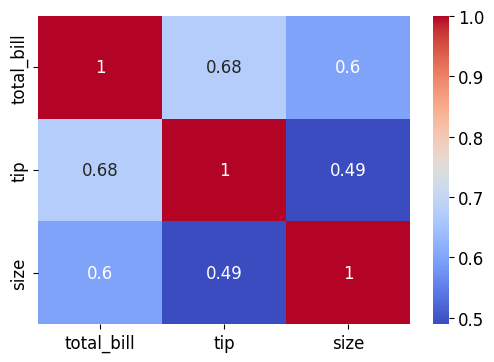

In [ ]:
# it's usefull to add annotation to see the correlation value, as well as appropriate color map
sns.heatmap(tips.corr(),cmap='coolwarm',annot=True)